In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('D:\Data mining BI\Data sets\Customer Data.csv')

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df[['MINIMUM_PAYMENTS','CREDIT_LIMIT']] = df[['MINIMUM_PAYMENTS','CREDIT_LIMIT']].fillna(df[['MINIMUM_PAYMENTS','CREDIT_LIMIT']].mean())

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
df.drop(['CUST_ID'],axis=1 , inplace = True)

In [10]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

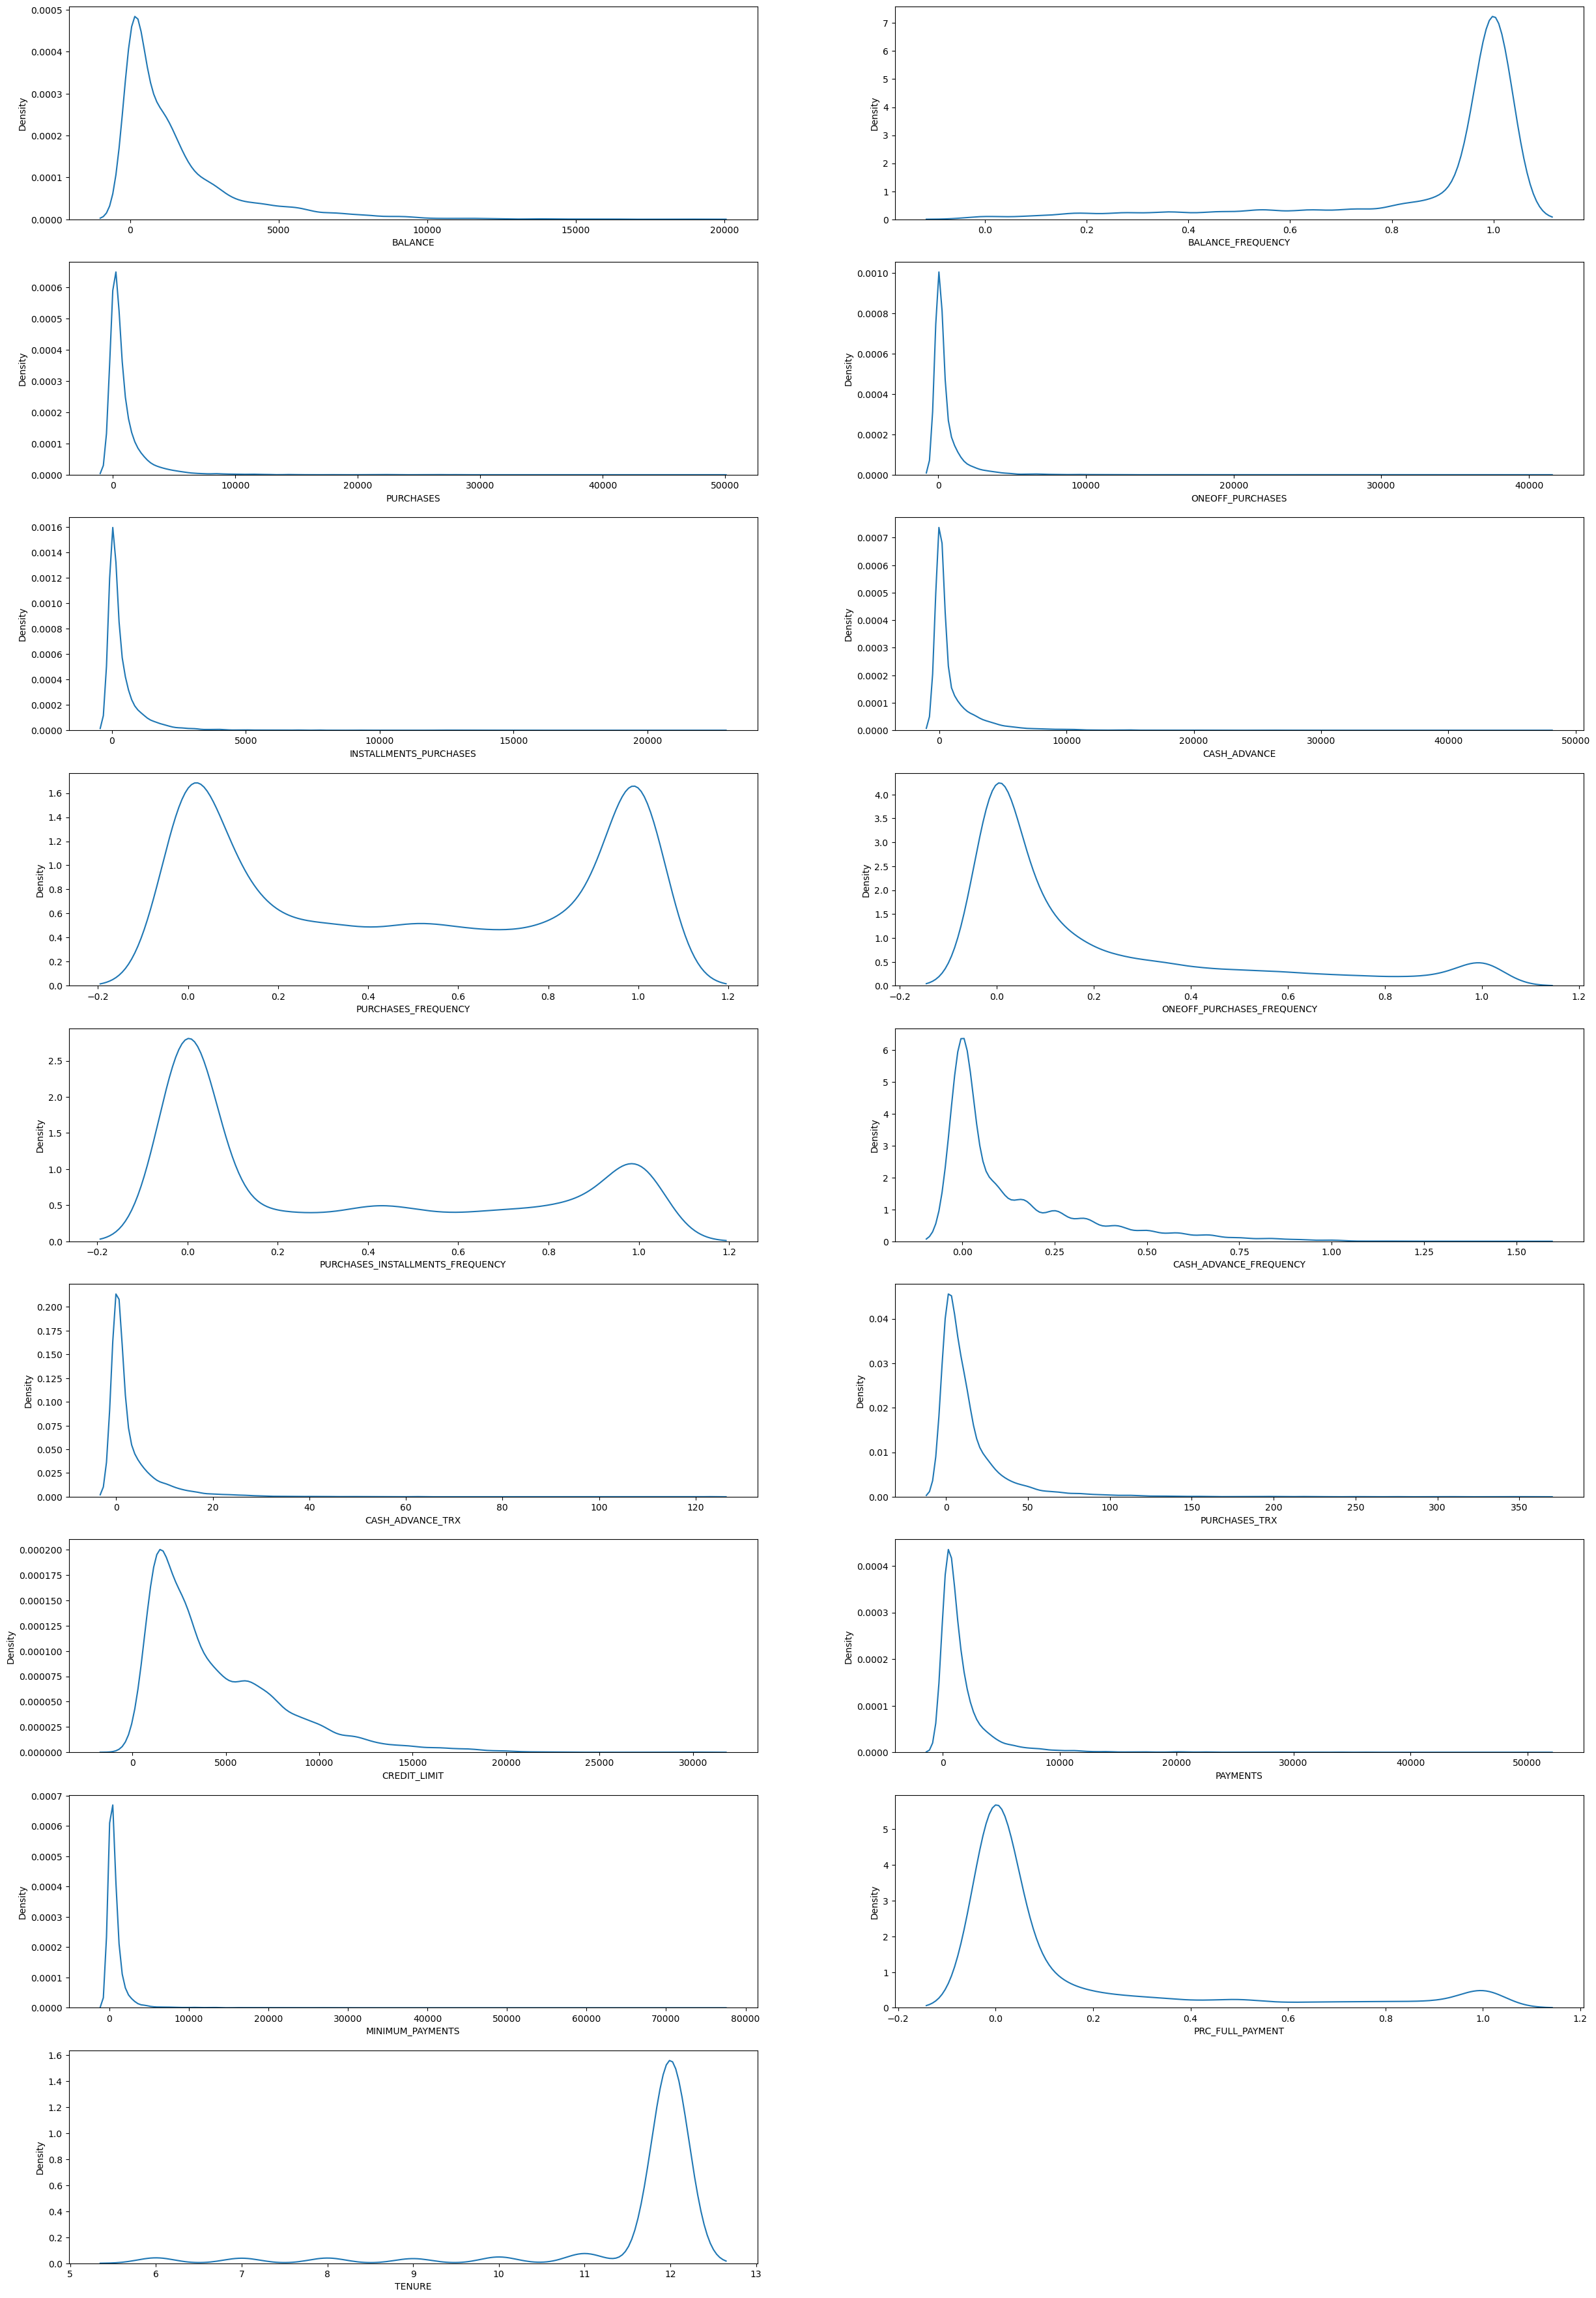

In [12]:
plt.figure(figsize=(30,45))
for i , col in enumerate(df.columns):
    ax = plt.subplot(9,2,i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)
plt.show()

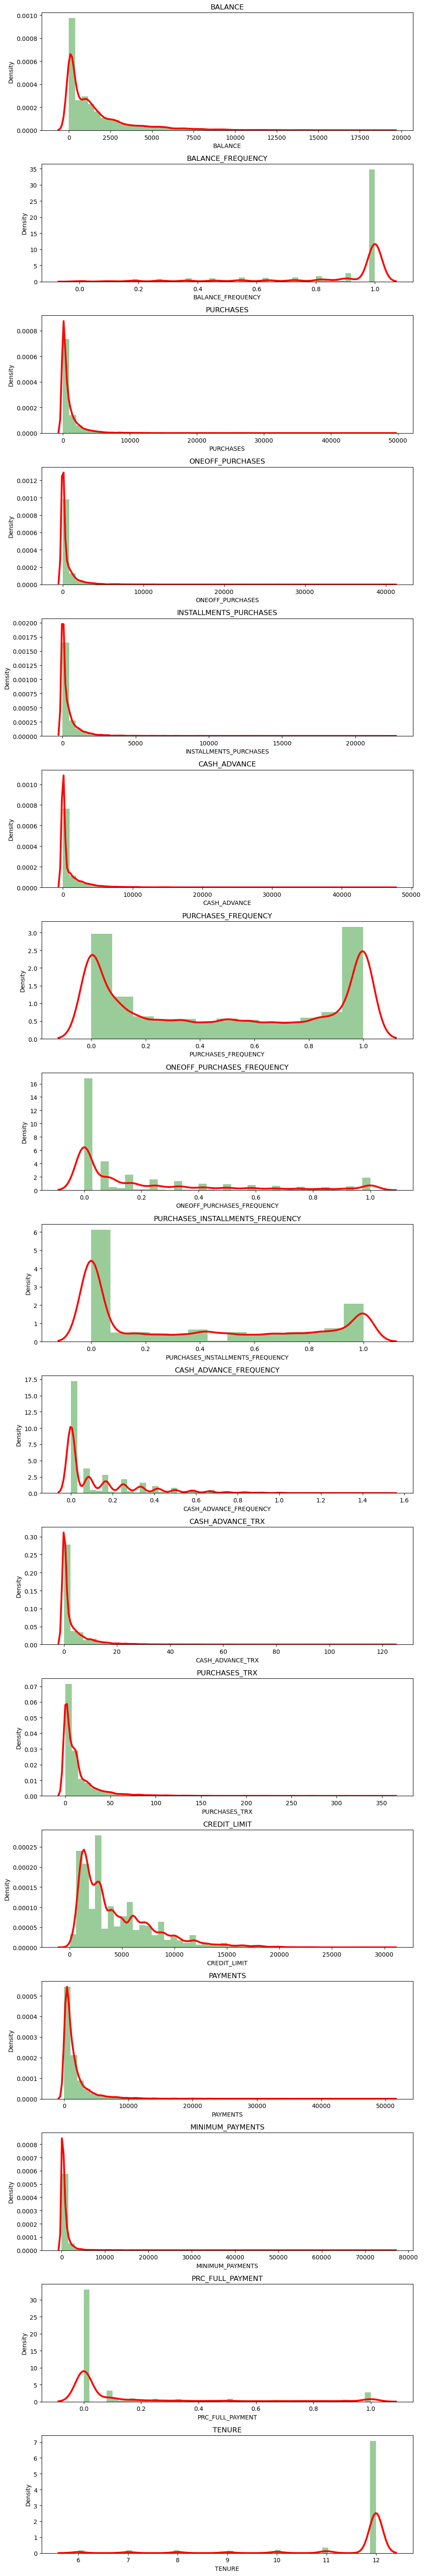

In [13]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'r' , 'bw':0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

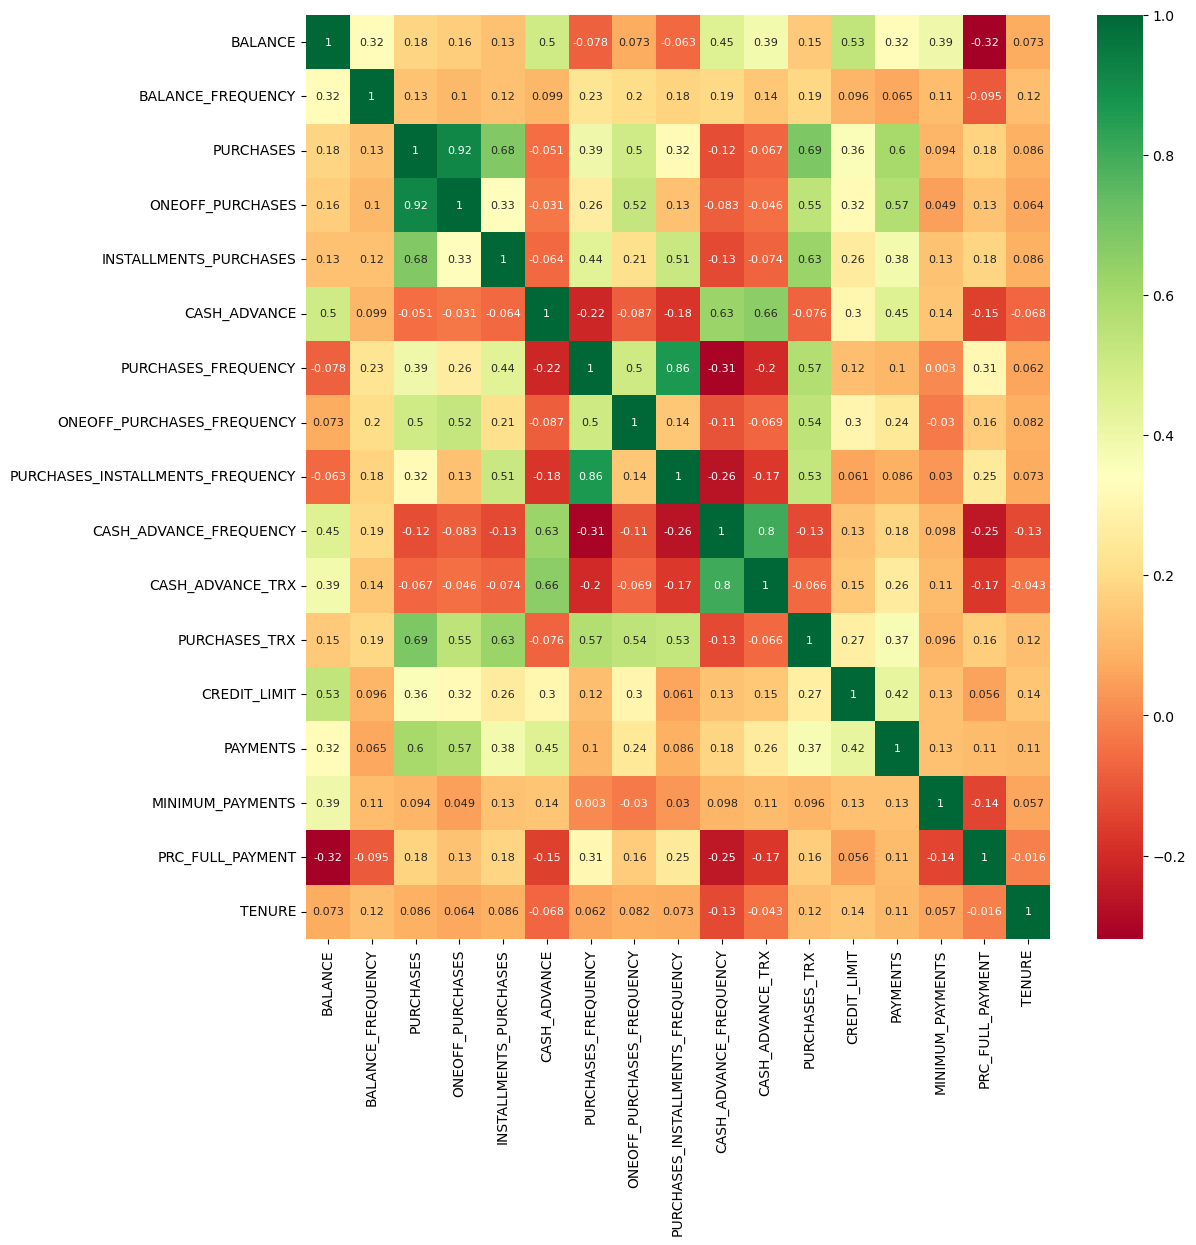

In [14]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn", annot_kws={"fontsize": 8});

In [15]:
scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)

In [16]:

r_data = PCA(n_components=2)
r_data = r_data.fit_transform(scaled_df)

results = pd.DataFrame(data = r_data,columns=['pca1','pca2'])
results

,pca1,pca2
0,-1.682220,-1.076448
1,-1.138286,2.506474
2,0.969659,-0.383464
3,-0.873621,0.043158
4,-1.599436,-0.688578
...,...,...
8945,-0.359630,-2.016150
8946,-0.564383,-1.639097
8947,-0.926206,-1.810786
8948,-2.336553,-0.657970


In [17]:
SSE = []
clusMn = 2
clusMx = 11
for cluster in range(clusMn,clusMx):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(r_data)
    SSE.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Graph')

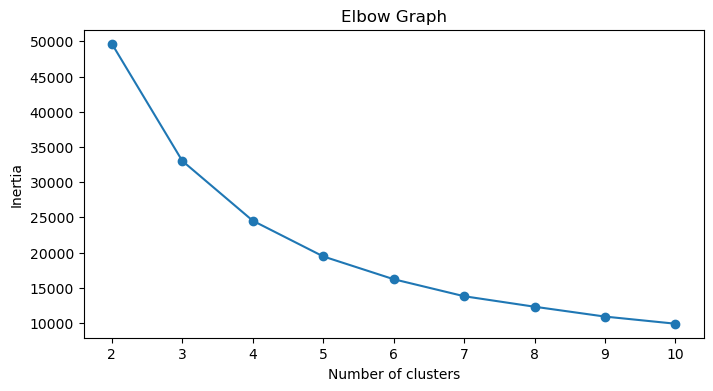

In [18]:
frame = pd.DataFrame({'Cluster':range(clusMn,clusMx), 'SSE':SSE})
plt.figure(figsize=(8,4))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Graph')

In [19]:
from kneed import KneeLocator

kn = KneeLocator(range(2, 11), SSE, curve="convex", direction="decreasing").elbow
kn

5

In [20]:
kmns = KMeans(n_clusters=kn, init='k-means++', max_iter = 300, random_state=5)
y_kmeans = kmns.fit_predict(scaled_df)
print(y_kmeans)
pca_df_kmeans = pd.concat([results,pd.DataFrame({'cluster':kmns.labels_})],axis = 1)


[0 2 3 ... 1 0 0]


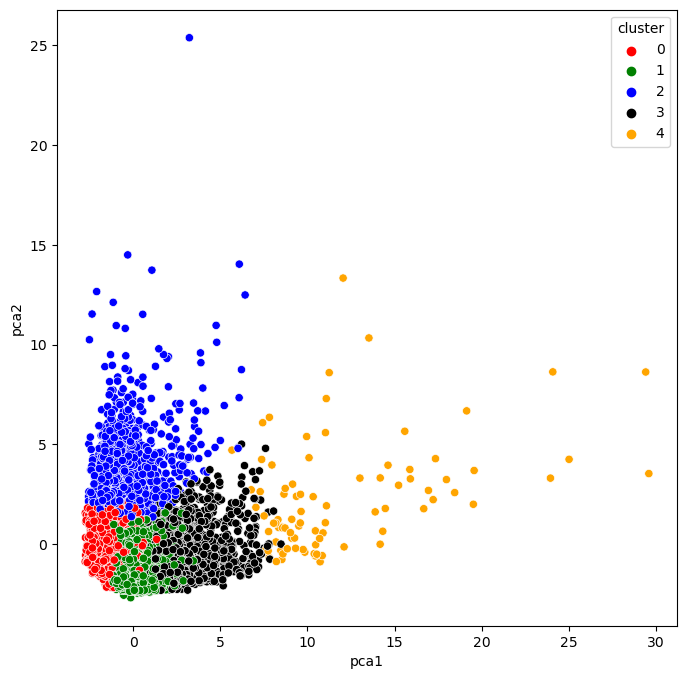

In [21]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x = 'pca1', y = 'pca2' ,hue = 'cluster' , data = pca_df_kmeans,palette=['red','green','blue','black', 'orange'])
plt.show()

In [22]:
cluster_center = pd.DataFrame(data=kmns.cluster_centers_,columns=[df.columns])
cluster_center = scalar.inverse_transform(cluster_center)
cluster_center = pd.DataFrame(data=cluster_center, columns=[df.columns])
cluster_center

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1055.782527,0.797277,278.701719,225.597146,53.306480,621.426219,0.163313,0.096803,0.065771,0.118988,2.213466,2.951798,3346.700956,1005.956760,600.575314,0.070492,11.455241
1,645.364672,0.902139,796.946942,166.182051,631.259412,178.170342,0.856615,0.083091,0.794395,0.038063,0.709905,16.639039,3199.049446,934.083755,679.125921,0.271751,11.454621
2,4622.768927,0.967852,494.933109,303.183397,191.838507,4641.104906,0.281434,0.130960,0.182778,0.491942,14.698690,7.393013,7558.693926,3606.372749,2010.529530,0.036109,11.379913
3,1891.925271,0.979339,2911.814090,1983.562601,928.685014,353.408743,0.923567,0.733701,0.584869,0.058192,1.154624,43.471098,6970.373752,2772.364320,829.043377,0.266129,11.888006
4,4523.752507,0.976907,15703.583218,10624.771724,5078.811494,1048.004595,0.928927,0.764855,0.784013,0.084291,2.954023,129.885057,12435.632184,15483.769000,3351.833958,0.390184,11.965517


In [23]:
cluster_df = pd.concat([df,pd.DataFrame({'cluster':kmns.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


<Axes: xlabel='cluster', ylabel='count'>

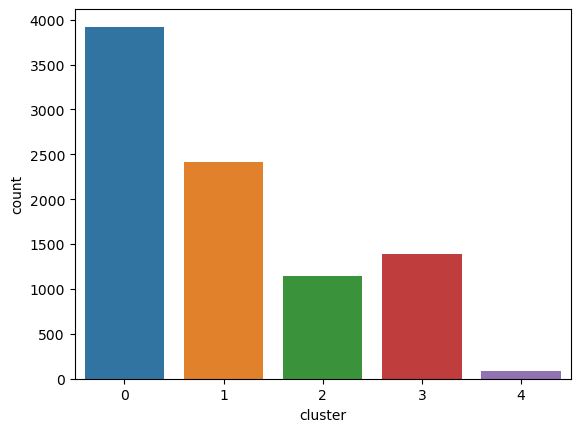

In [24]:
sns.countplot(x='cluster',data=cluster_df)

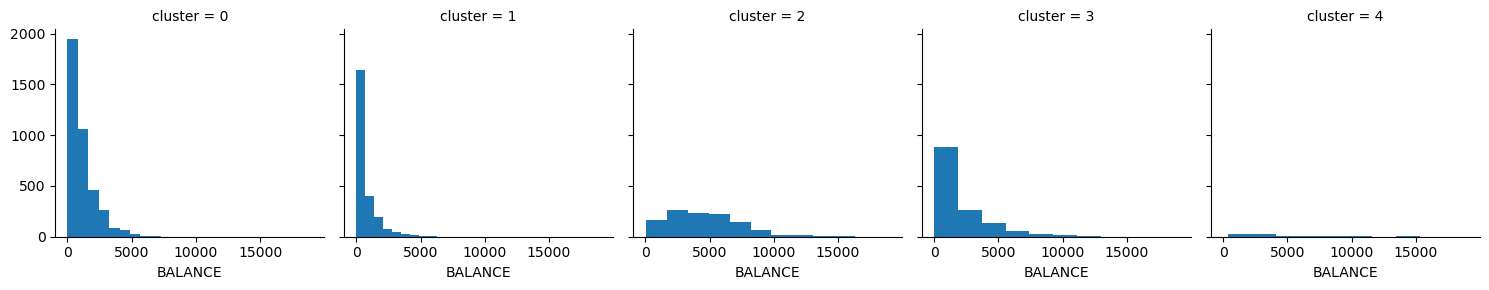

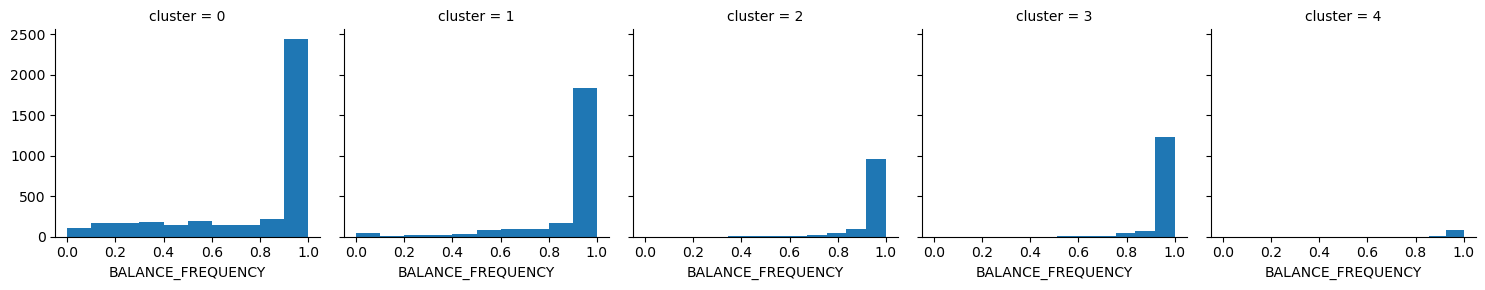

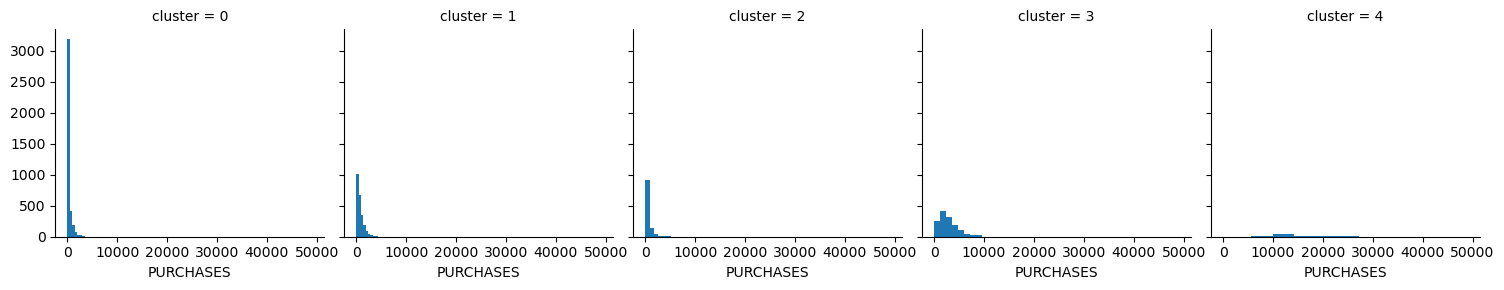

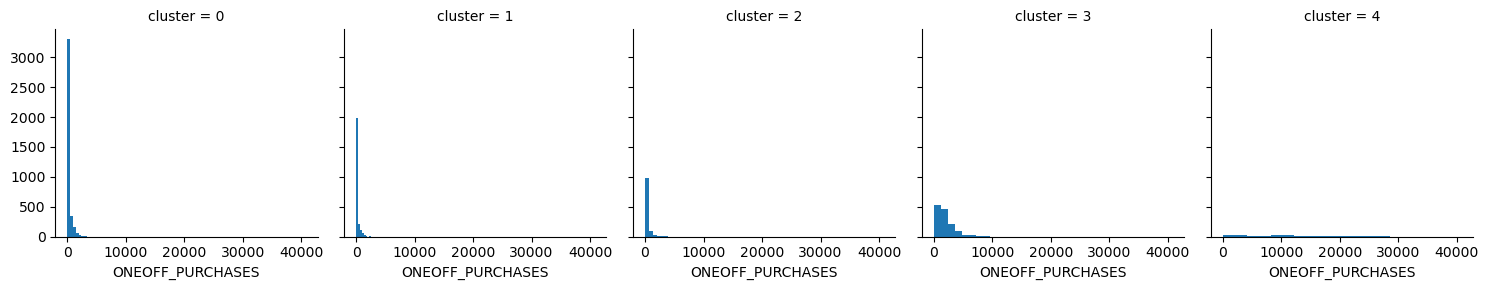

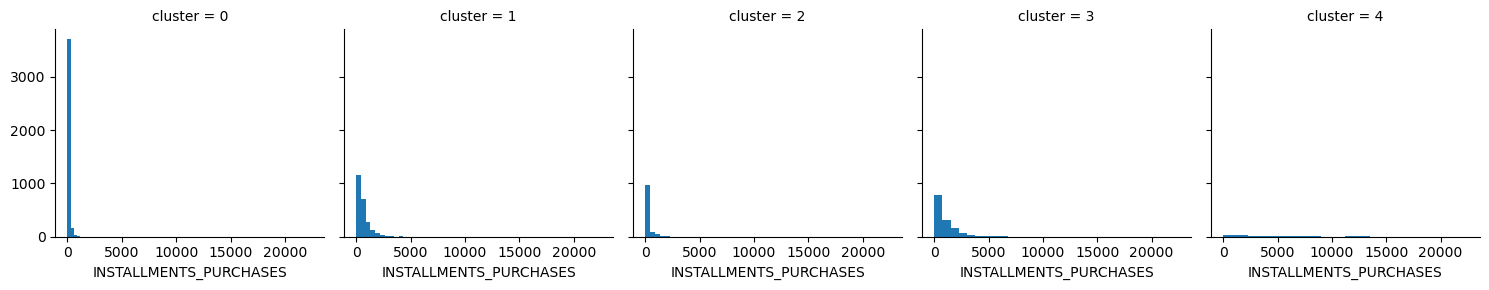

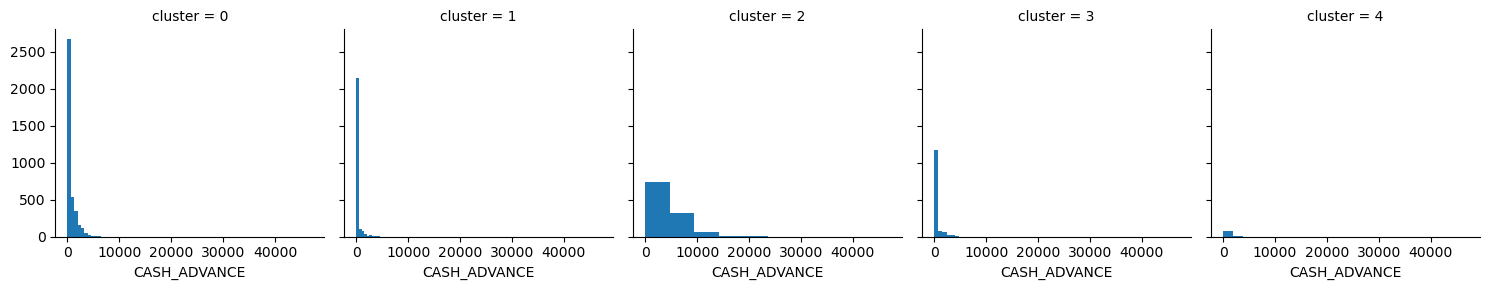

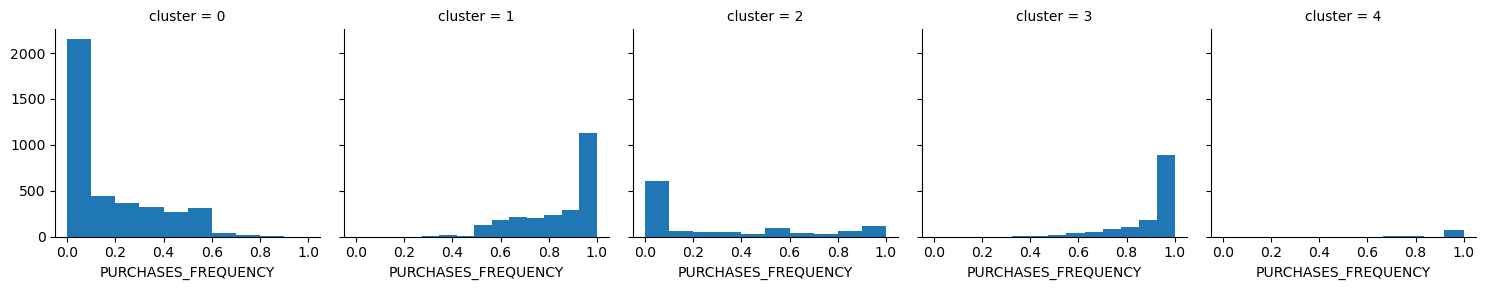

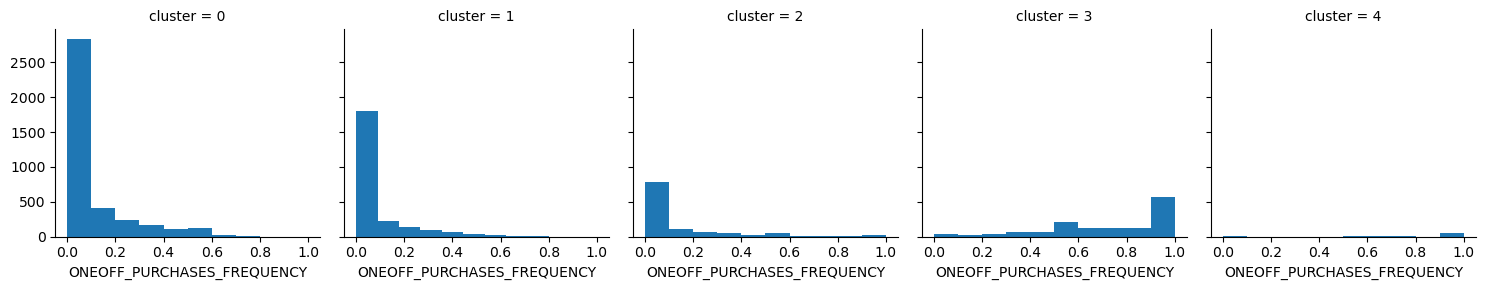

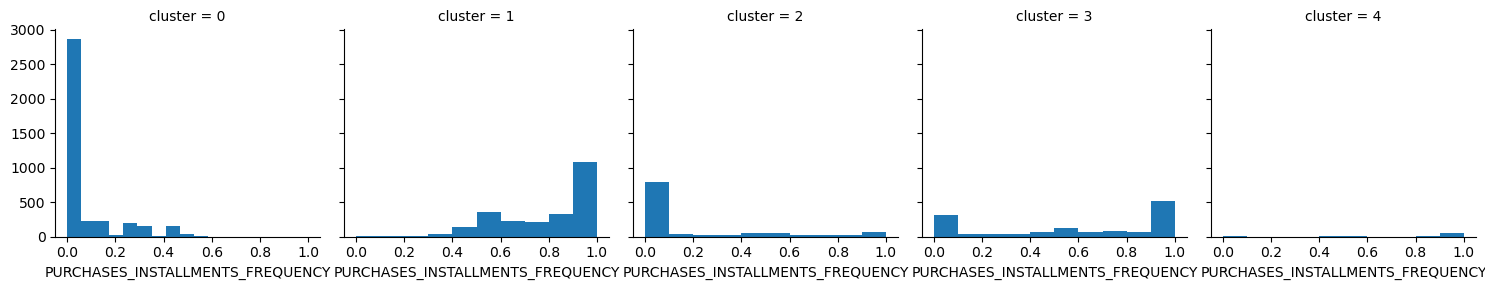

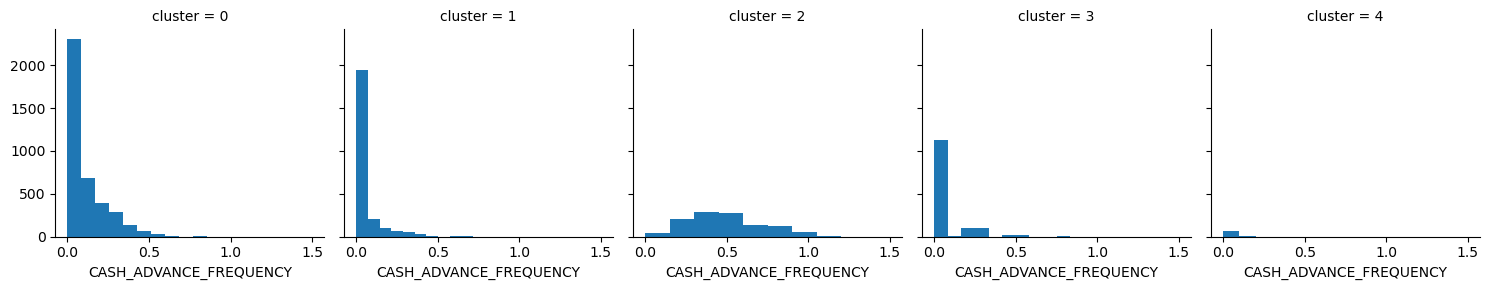

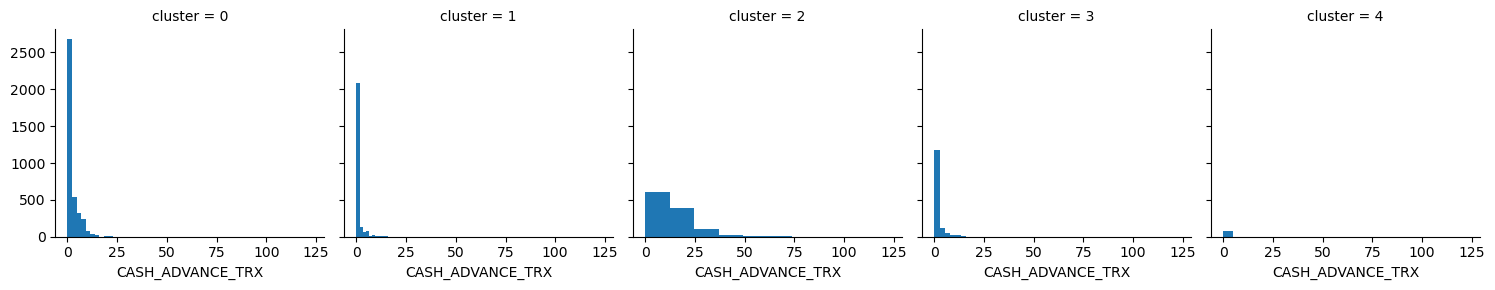

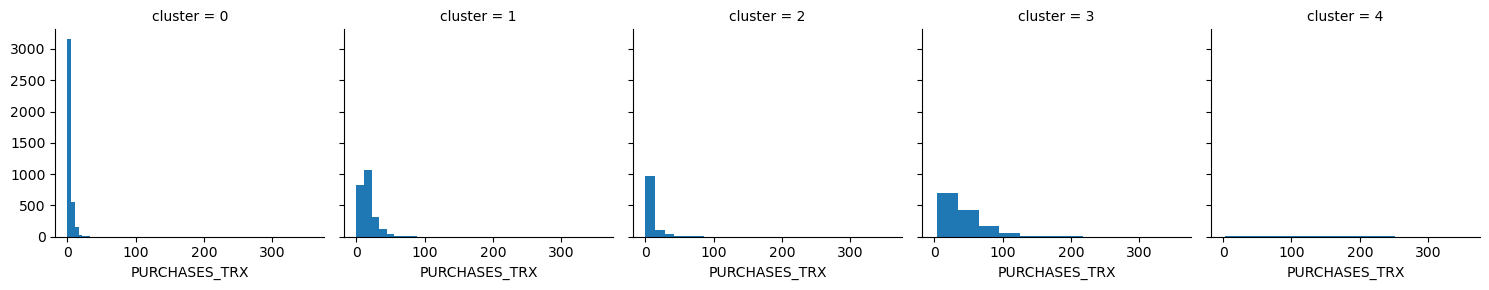

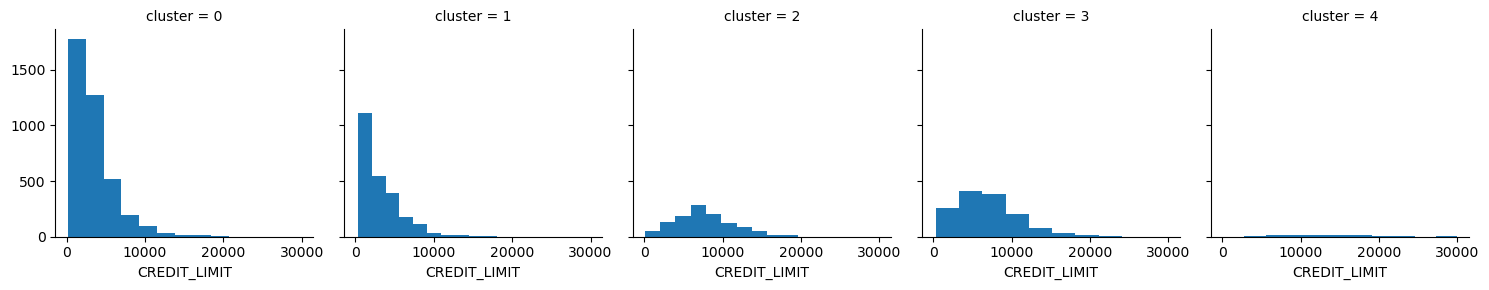

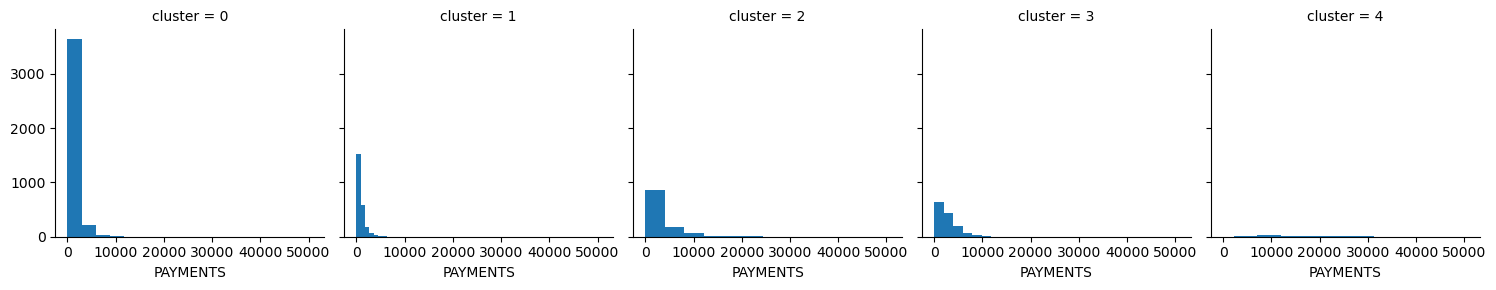

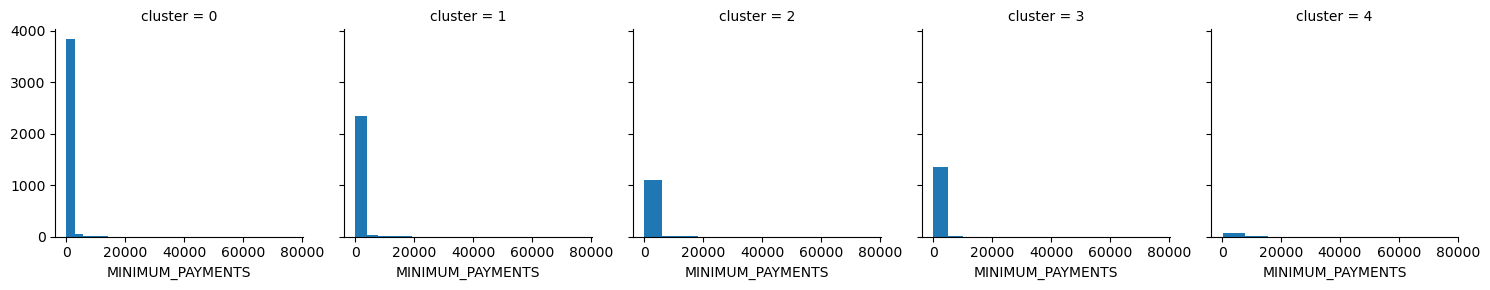

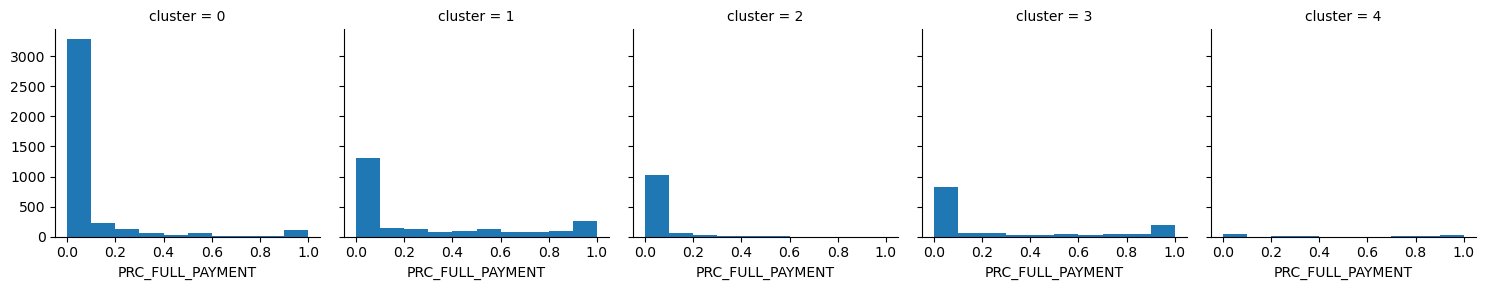

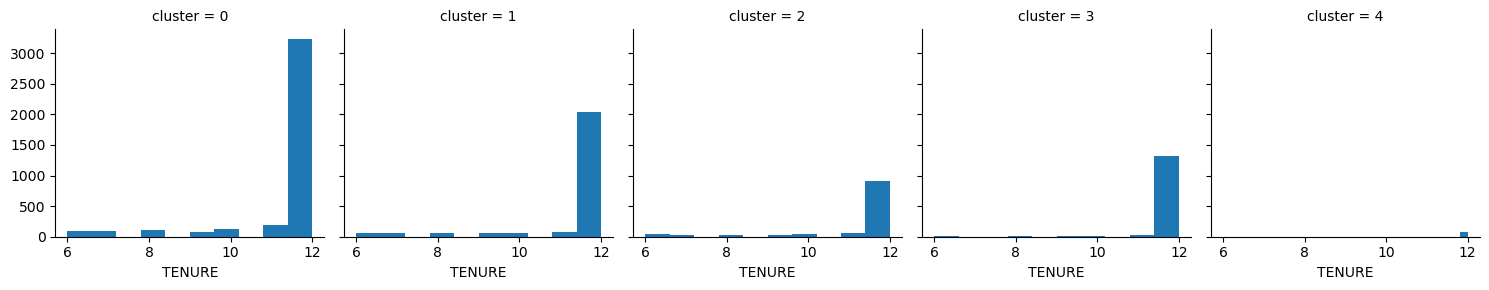

In [25]:
for c in cluster_df.drop(['cluster'],axis=1):
    grid=sns.FacetGrid(cluster_df , col = 'cluster')
    grid = grid.map(plt.hist,c)
plt.show()

In [26]:
import joblib


#Save the model to a file
joblib.dump(kmns, 'project')

['project']

In [27]:
cluster_df.to_csv('project_file.csv')

In [28]:
X =cluster_df.drop(['cluster'],axis = 1)
y = cluster_df[['cluster']]

In [29]:
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [30]:
y

,cluster
0,0
1,2
2,3
3,0
4,0
...,...
8945,1
8946,1
8947,1
8948,0


In [31]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=30) 

In [32]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
depth = 4
clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth)

# Train Classifer

clf = clf.fit(X_train,y_train)

#### clf

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [33]:

result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

print(classification_report(y_test, y_pred))


Confusion Matrix:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1159
           1       0.94      0.87      0.90       722
           2       0.79      0.76      0.77       363
           3       0.79      0.91      0.84       415
           4       1.00      0.73      0.84        26

    accuracy                           0.88      2685
   macro avg       0.89      0.84      0.86      2685
weighted avg       0.89      0.88      0.89      2685



In [43]:
# get total number of 0 in the actual dataset
count0 = y[y==0].count()
count1 = y[y==1].count()
count2 = y[y==2].count()
count3 = y[y==3].count()

# get total number of 0 in the actual dataset
count4 = y[y==4].count()

print("Actual Dataset")
print("0's:", count0)
print("1's:", count1)
print("2's:", count2)
print("3's:", count3)
print("1's:", count4)




Trcount0 = y_train[y_train==0].count()

# get total number of 1 in the training dataset
Trcount1 = y_train[y_train==1].count()
Trcount2 = y_train[y_train==2].count()
Trcount3 = y_train[y_train==3].count()
Trcount4 = y_train[y_train==4].count()

# Plotting the bar chart

counts = [Trcount0, Trcount1,Trcount2,Trcount3,Trcount4]
counts


Actual Dataset
0's: cluster    3921
dtype: int64
1's: cluster    2414
dtype: int64
2's: cluster    1145
dtype: int64
3's: cluster    1384
dtype: int64
1's: cluster    86
dtype: int64


[cluster    2762
 dtype: int64,
 cluster    1692
 dtype: int64,
 cluster    782
 dtype: int64,
 cluster    969
 dtype: int64,
 cluster    60
 dtype: int64]

In [39]:
import pickle
filename = 'project_final.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.8849162011173184 % Acuuracy


In [40]:
g = [[3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12]]
loaded_model.predict(g)

array([2])